In [96]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import argparse
import os

In [97]:
DIR_TRAIN = "dataset-cropped/Train/"
DIR_TEST = "dataset-cropped/Test/"

In [98]:
images = []
labels = []

for tps in os.listdir(DIR_TRAIN):
    for paslon in os.listdir(os.path.join(DIR_TRAIN, tps)):
        for section in os.listdir(os.path.join(DIR_TRAIN, tps, paslon)):
            path = os.path.join(DIR_TRAIN, tps, paslon, section)

            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (40, 240))
            img = cv2.GaussianBlur(img, (5, 5), 0)
            # imt = cv2.medianBlur(img, 5)

            th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 19, 2)
            # cv2.floodFill(th, None, (0, 0), 123, )
            
            th = th / 255.0
            labels.append(tps + "/" + paslon)
            images.append(th)



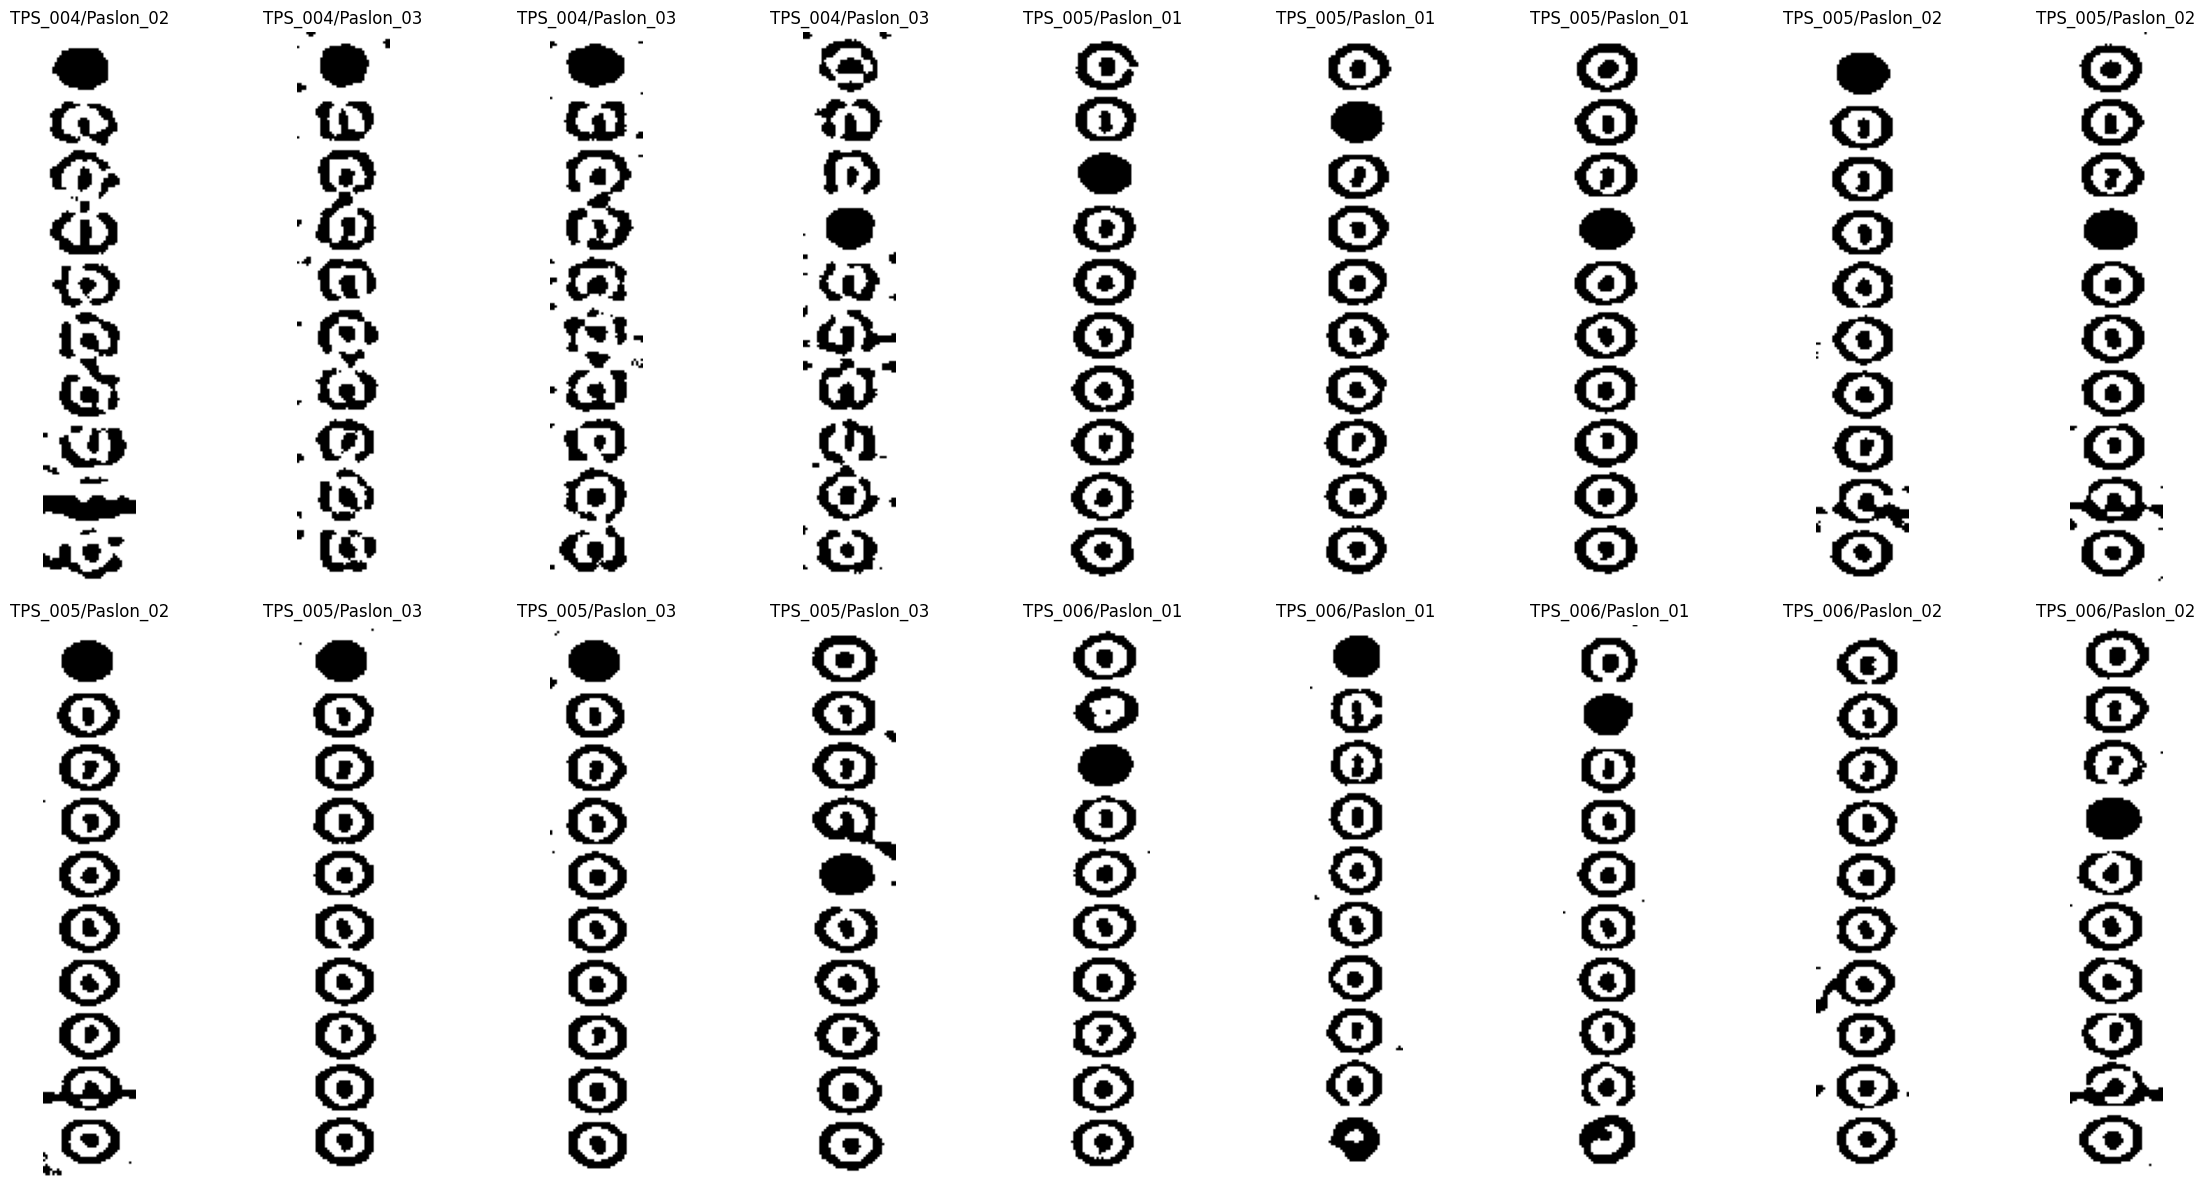

In [99]:
plt.figure(figsize=(24, 12))
for i in range (18):
    plt.subplot(2, 9, i + 1)
    plt.axis("off")
    fig = plt.imshow(images[i+32], 'gray')
    plt.title(labels[i+32])

plt.tight_layout()
plt.show()